<a href="https://colab.research.google.com/github/kirubanath/ML_learnings/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [ ]:
index = train_y == 3

In [ ]:
Y = train_y[index]

In [ ]:
X = train_X[index]

Taking the first 200 images of 3

In [ ]:
X = X[:200]

Example Images

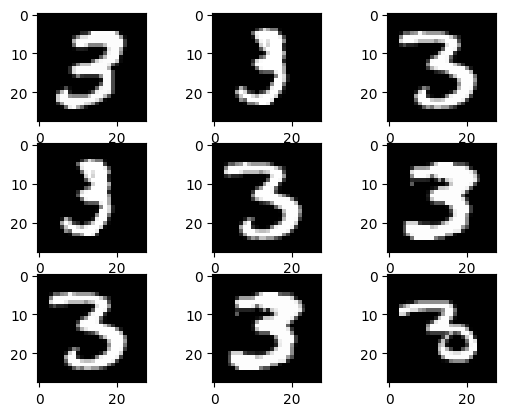

In [ ]:
fig, ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):      
        ax[i,j].imshow(X[i+j], cmap=plt.get_cmap('gray'))

plt.show()

Finding the mean:

In [ ]:
Mean = np.zeros((28,28))

In [ ]:
for i in range(200):
    Mean += X[i]
Mean = Mean/200

Mean of the data:

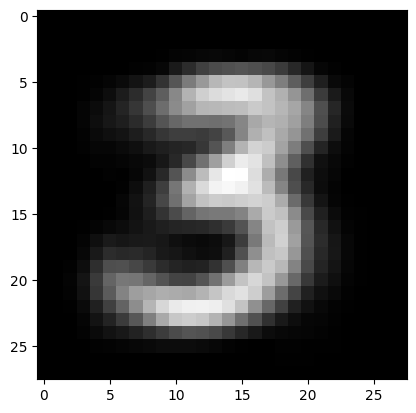

In [ ]:
plt.imshow(Mean, cmap=plt.get_cmap('gray'));

Mean centering the data:

In [ ]:
normal_x = np.zeros((200,28,28))

In [ ]:
for i in range(200):
    normal_x[i] = X[i]-Mean

In [ ]:
normal_x.shape

(200, 28, 28)

Mean centered Data

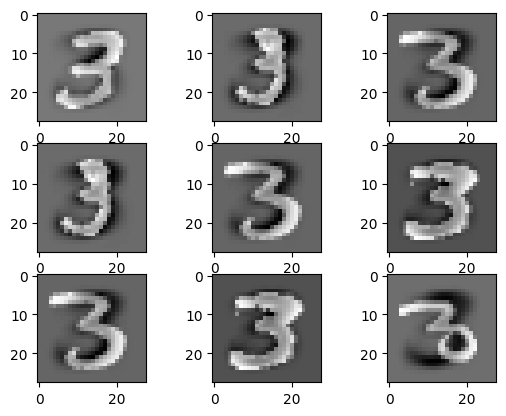

In [ ]:
fig, ax = plt.subplots(3,3)
for i in range(3):
    for j in range(3):      
        ax[i,j].imshow(normal_x[i+j], cmap = plt.get_cmap('gray') )

plt.show()

Flatten the images to make them into features

In [ ]:
Features = np.array([x.flatten() for x in X])

In [ ]:
Features.shape

(200, 784)

Finding the Covariance Matrix:

In [ ]:
Cov_mat = np.cov(Features.T)

In [ ]:
Cov_mat.shape

(784, 784)

Finding the eigen values and eigen vectors:

In [ ]:
eig_val, eig_vec = np.linalg.eig(Cov_mat)

In [ ]:
index = np.argsort(eig_val)

In [ ]:
index = index[::-1][:3]

In [ ]:
#corresponding eigen vectors:
Principal_vectors = eig_vec[:,index]

In [ ]:
Principal_vectors.shape

(784, 3)

In [ ]:
Vector1 = Principal_vectors[:,0].reshape(28,28).real
Vector2 = Principal_vectors[:,1].reshape(28,28).real
Vector3 = Principal_vectors[:,2].reshape(28,28).real

Vizualizing Mean, and the three pinciple vectors

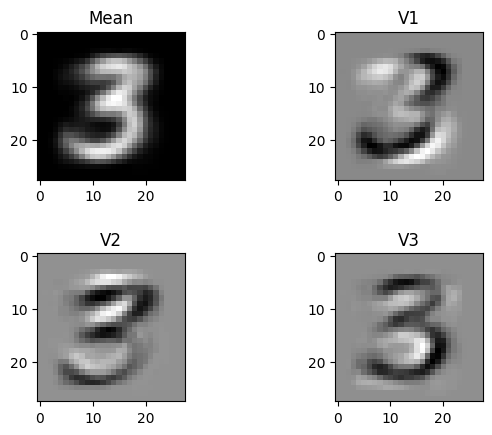

In [ ]:
fig, ax = plt.subplots(2,2)

ax[0,0].imshow(Mean, cmap = plt.get_cmap('gray'))
ax[0,0].title.set_text('Mean')

ax[0,1].imshow(Vector1, cmap = plt.get_cmap('gray'))
ax[0,1].title.set_text('V1')

ax[1,0].imshow(Vector2, cmap = plt.get_cmap('gray'))
ax[1,0].title.set_text('V2')

ax[1,1].imshow(Vector3, cmap = plt.get_cmap('gray'))
ax[1,1].title.set_text('V3')

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.show()

Now using these three principle vectors we can find the reduced data as:

Betas = Vectors.Transpose * Mean_centered_data.Transpose

Now these Betas are the representation of the original images in the reduced dimension. This can be then used for classification.

In [ ]:
Reduced_data = (Principal_vectors.T@Features.T).T

In [ ]:
X.shape

(200, 28, 28)

In [ ]:
Reduced_data.shape

(200, 3)

As we can see above the original Image of 28x28 is now being represented with only 3 features(3 components/axis)